# 필요한 모듈 임포트

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# EDA

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv') # test에 Survived 컬럼이 없어 merge하는 용도

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
gender_submission.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [6]:
# cabin은 객실번호, embarked는 기항지(목적지로 가는 도중에 들르는 항구) 
# embarked : C = Cherbourg, Q = Queenstown, S = Southampton
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
# passengerid 1 ~ 891은 train / 892 ~ 1390은 test
print(test['PassengerId'].unique().min(), test['PassengerId'].unique().max())

892 1309


In [9]:
# 0은 사망, 1은 생존
train.Survived.unique()

array([0, 1], dtype=int64)

In [10]:
train.Sex.unique()

array(['male', 'female'], dtype=object)

In [11]:
# 1이면 형제 자매가 한 명 있다. (남편이나 아내가 한 명 있다.)
sorted(train.SibSp.unique())

[0, 1, 2, 3, 4, 5, 8]

In [12]:
# 1이면 부모나 자식이 한 명 있다. (nanny와 travel하면 그런 아이는 0)
sorted(train.Parch.unique())

[0, 1, 2, 3, 4, 5, 6]

In [13]:
# 객실번호
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [14]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Data Analysis

## train, text 병합, titanic 데이터 프레임 생성

In [15]:
# test와 gender_submission 병합
test_for_merge = test.merge(gender_submission, on='PassengerId', how='left')
titanic = pd.concat([train, test_for_merge], ignore_index=True)
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 생존 vs 사망 숫자

In [16]:
survived = titanic.groupby('Survived').size()
survived

Survived
0    815
1    494
dtype: int64

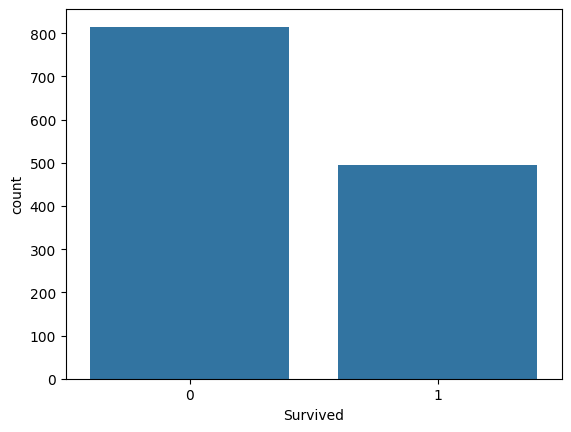

In [17]:
sns.countplot(data=titanic, x="Survived")
plt.show()

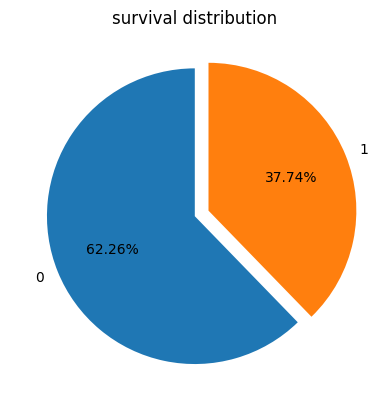

In [18]:
sp = survived.plot(kind='pie', autopct='%.2f%%', startangle=90, explode=[0,0.1])
plt.title('survival distribution')
sp.set_ylabel('')
plt.show()

## 성별에 따른 생존 여부

In [19]:
titanic.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           385
male    0           734
        1           109
dtype: int64

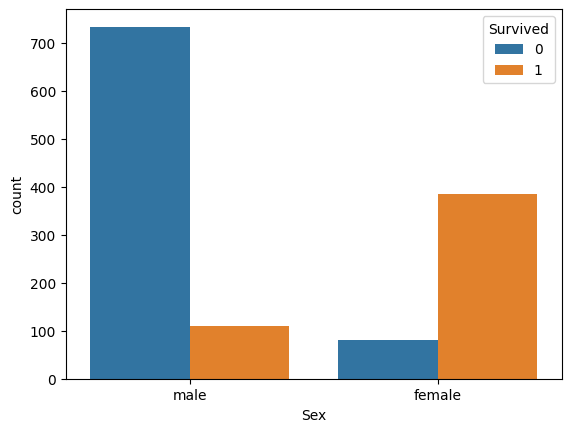

In [20]:
sns.countplot(data=titanic, x="Sex", hue="Survived")
plt.show()

## 좌석 클래스에 따른 생존 여부

In [21]:
pclass_total = titanic.groupby('Pclass').size().reset_index().rename(columns={0:'total'})
pclass_for_merge = titanic.groupby(['Pclass', 'Survived']).size().reset_index().rename(columns={0:'count'})
merged_pclass = pclass_for_merge.merge(pclass_total, on='Pclass', how='left')
merged_pclass['percentage'] = (merged_pclass['count'] / merged_pclass['total']) * 100
merged_pclass[merged_pclass['Survived'] == 1]

,Pclass,Survived,count,total,percentage
1,1,1,186,323,57.585139
3,2,1,117,277,42.238267
5,3,1,191,709,26.939351


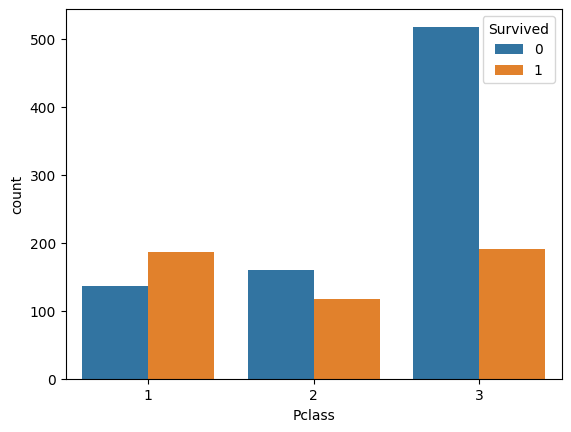

In [22]:
sns.countplot(data=titanic, x="Pclass", hue="Survived")
plt.show()
# 생존률로 따지면 1등급이 가장 생존률이 높다.

## embarked에 따른 생존 여부

In [23]:
# embarked 결측값 처리 -> 최빈값으로 대체한다.
titanic['Embarked'].mode() # 'S'
titanic['Embarked'] = titanic['Embarked'].fillna('S')

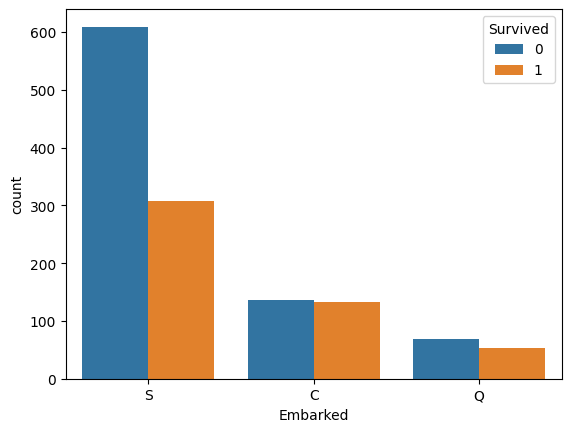

In [24]:
sns.countplot(data=titanic, x="Embarked", hue="Survived")
plt.show()

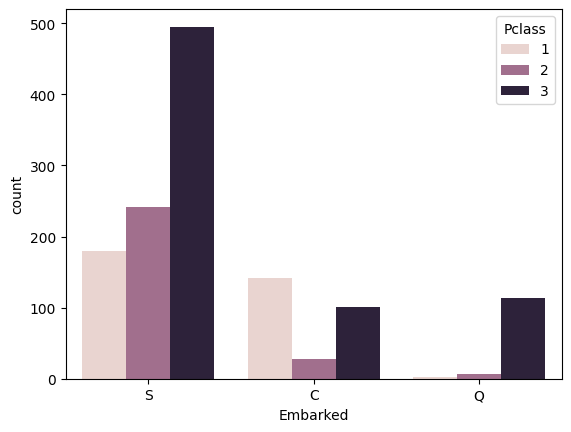

In [25]:
sns.countplot(data=titanic, x="Embarked", hue="Pclass")
plt.show()

## 나이에 따른 생존 여부

In [26]:
# 이름의 두번째 부분에 신분을 나타내는 부분이 있다. 이 신분에 해당되는 사람들의 평균 나이로 나이 결측값을 채운다.

In [27]:
titanic['name_cate'] = titanic['Name'].str.split(",").str[1].str.split(".").str[0]

In [28]:
titanic['name_cate_avg_age'] = titanic.groupby('name_cate')['Age'].transform('mean')

In [29]:
titanic.loc[titanic['Age'].isnull(), 'Age'] = titanic.loc[titanic['Age'].isnull(), 'name_cate_avg_age'].values

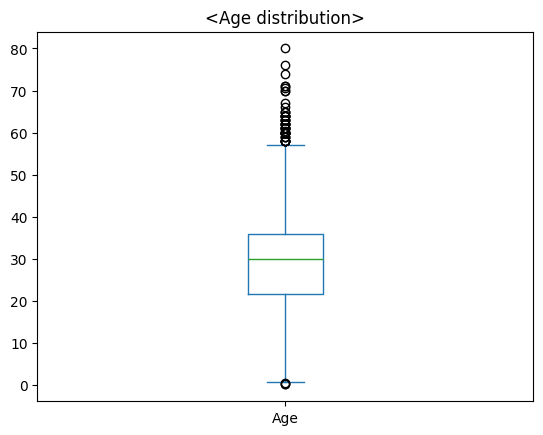

In [30]:
# age 박스플롯
titanic['Age'].plot(kind='box')
plt.title('<Age distribution>')
plt.show()

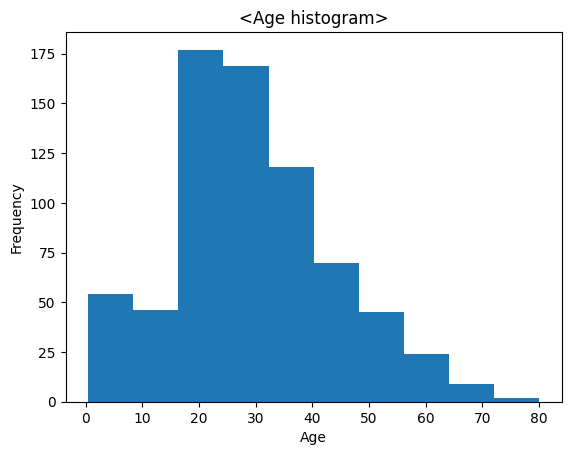

In [31]:
train['Age'].plot(kind='hist')
plt.xlabel('Age')
plt.title('<Age histogram>')
plt.show()

In [32]:
bins = [0, 10, 20, 40, 60, 80]  # 원하는 구간 설정
labels = ['~10', '10~20', '20~40', '40~60', '60~']  # 각 구간에 대한 라벨
age_groups = pd.cut(titanic['Age'], bins=bins, labels=labels)
age_groups

0       20~40
1       20~40
2       20~40
3       20~40
4       20~40
        ...  
1304    20~40
1305    20~40
1306    20~40
1307    20~40
1308      ~10
Name: Age, Length: 1309, dtype: category
Categories (5, object): ['~10' < '10~20' < '20~40' < '40~60' < '60~']

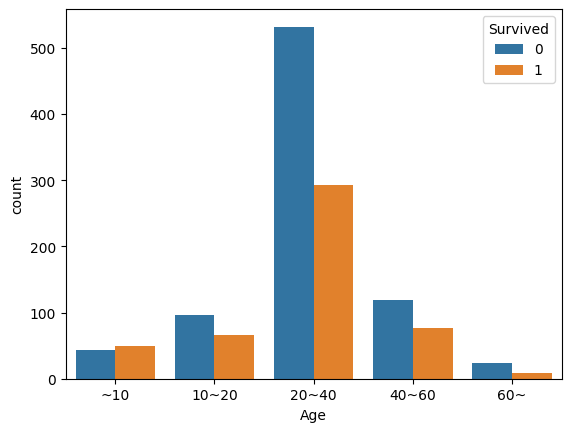

In [33]:
temp = pd.concat([titanic[['Survived', 'Sex']], age_groups], axis=1)
sns.countplot(data=temp, x='Age', hue='Survived')
plt.show()

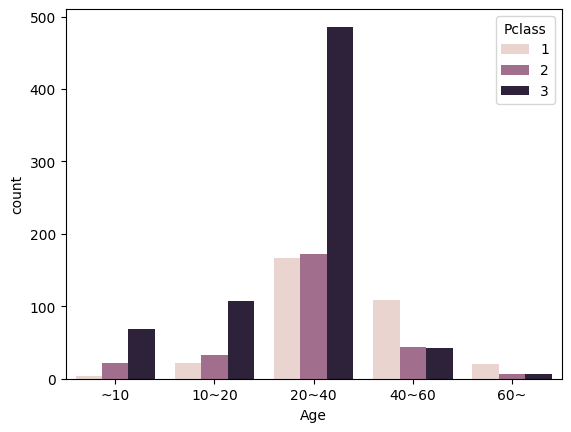

In [34]:
temp2 = pd.concat([temp, titanic['Pclass']], axis=1)
sns.countplot(data=temp2, x='Age', hue='Pclass')
plt.show()

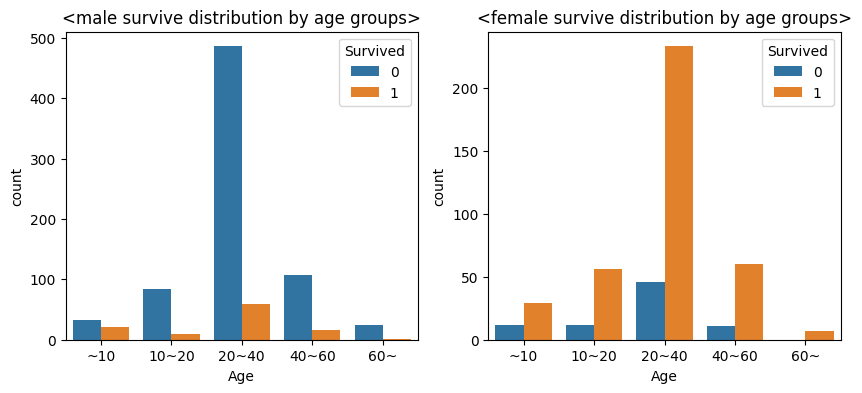

In [35]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=temp.loc[temp['Sex']=='male'], x="Age", hue="Survived")
plt.title('<male survive distribution by age groups>')
plt.subplot(1, 2, 2)
sns.countplot(data=temp.loc[temp['Sex']=='female'], x="Age", hue="Survived")
plt.title('<female survive distribution by age groups>')
plt.show()

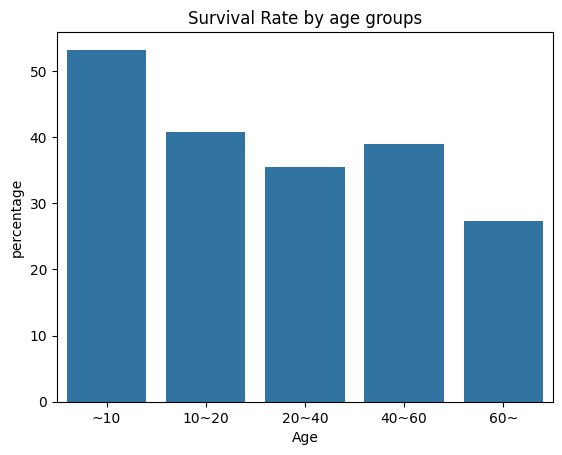

In [36]:
import warnings

# FutureWarning 무시
warnings.simplefilter(action='ignore', category=FutureWarning)

total = temp.groupby('Age').size().reset_index().rename(columns={0:'total'})

temp_for_concat = temp.groupby(['Age', 'Survived']).size().reset_index().rename(columns={0:'count'})
merged_temp = temp_for_concat.merge(total, on='Age', how='left')
merged_temp['percentage'] = (merged_temp['count']/merged_temp['total']) * 100

sns.barplot(data=merged_temp[merged_temp['Survived']==1], x='Age', y='percentage')
plt.title("Survival Rate by age groups")
plt.show()

## alone vs not alone 에 따른 생존 여부

In [37]:
# FamilySize라는 새로운 변수 column 생성
# 형제, 배우자 수 + 부모, 자식 수 + 1(혼자일 경우 1로 표시)
titanic['family_size'] = (titanic['SibSp'] + titanic['Parch'] + 1)

# 'Alone' column 생성하고 값을 0으로 초기화
titanic['alone'] = 0
# FamilySize가 1인 승객들은 Alone 값을 1로 변경
titanic.loc[titanic['family_size'] == 1, 'alone'] = 1

In [38]:
titanic['alone'].value_counts()

alone
1    790
0    519
Name: count, dtype: int64

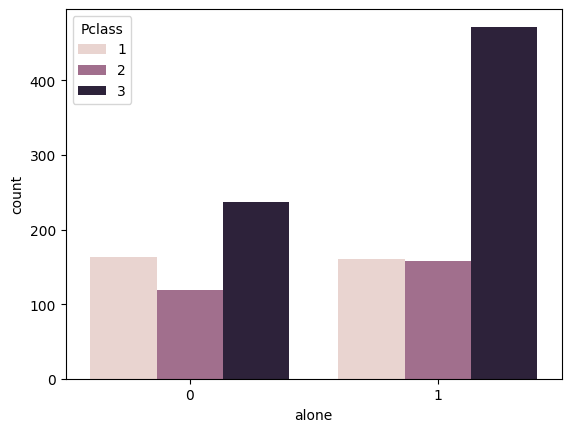

In [39]:
sns.countplot(data=titanic, x='alone', hue='Pclass')
plt.show()

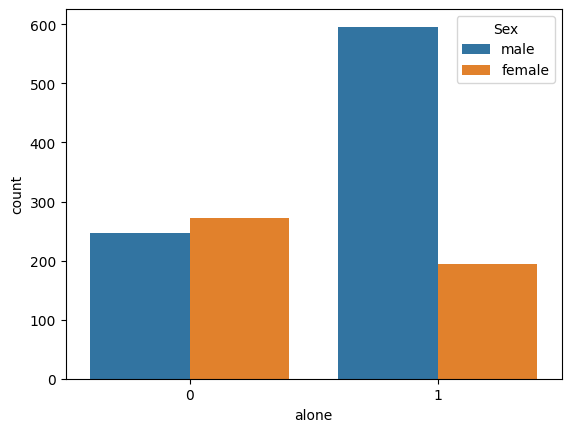

In [40]:
sns.countplot(data=titanic, x='alone', hue='Sex')
plt.show()

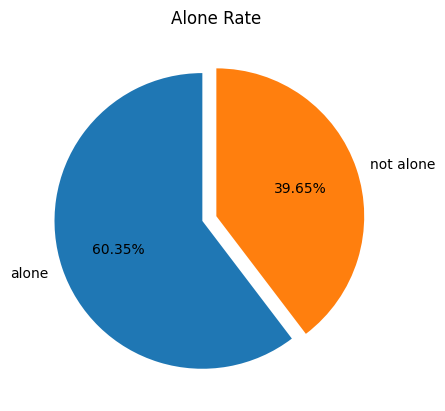

In [41]:
# 혼자 인지 아닌지 그 수 파악
gr = titanic['alone'].value_counts().plot(kind='pie', autopct='%.2f%%', startangle=90, explode=[0.1,0], labels=['alone', 'not alone'])
plt.title('Alone Rate')
gr.set_ylabel('')
plt.show()

In [42]:
# alone vs not alone 생존률 파악
total = titanic.groupby('alone').size().reset_index().rename(columns={0:'total'})

temp = titanic.groupby(['alone', 'Survived']).size().reset_index().rename(columns={0:'count'})

merged_temp = temp.merge(total, on='alone', how='left')

merged_temp['percentage'] = (merged_temp['count'] / merged_temp['total']) * 100

merged_temp

,alone,Survived,count,total,percentage
0,0,0,256,519,49.325626
1,0,1,263,519,50.674374
2,1,0,559,790,70.759494
3,1,1,231,790,29.240506


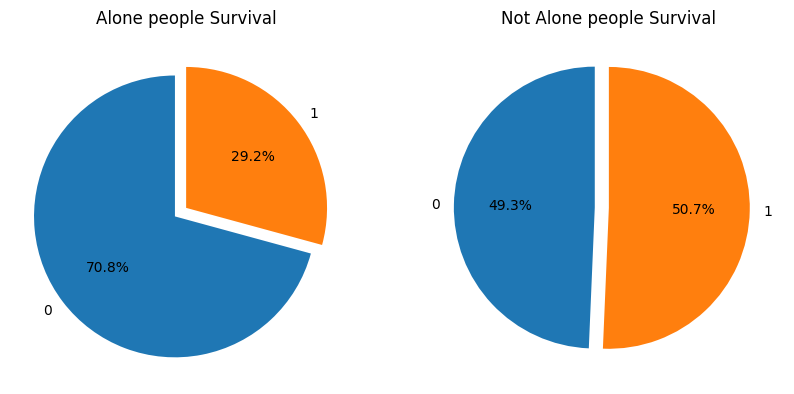

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
alone_true = merged_temp.loc[merged_temp['alone']==1].set_index('Survived')
plt.pie(alone_true['count'], labels=alone_true.index, startangle=90, explode=[0.1,0], autopct='%1.1f%%')
plt.title('Alone people Survival')

plt.subplot(1,2,2)
alone_false = merged_temp.loc[merged_temp['alone'] == 0].set_index('Survived')
plt.pie(alone_false['count'], labels=alone_false.index, startangle=90, explode=[0.1, 0], autopct='%1.1f%%')
plt.title('Not Alone people Survival')

plt.show()

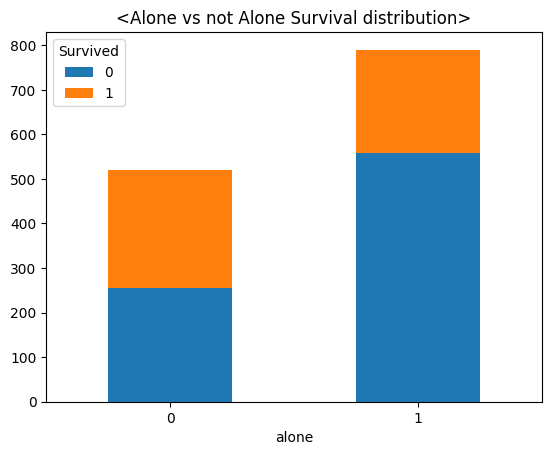

In [44]:
merged_temp.pivot(index='alone', columns='Survived', values='count').plot(kind='bar', stacked=True, rot=0)
plt.title('<Alone vs not Alone Survival distribution>')
plt.show()

# 추가적 분석(피처간 관계)

## 좌석등급과 성별의 관계

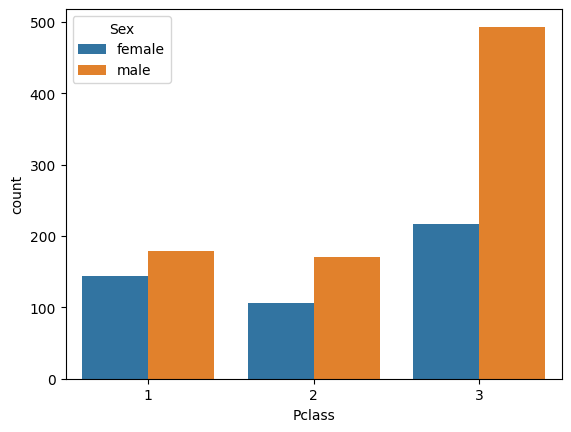

In [45]:
sns.countplot(data=titanic, x='Pclass', hue='Sex')
plt.show()

## 요금과 생존 여부와의 관계

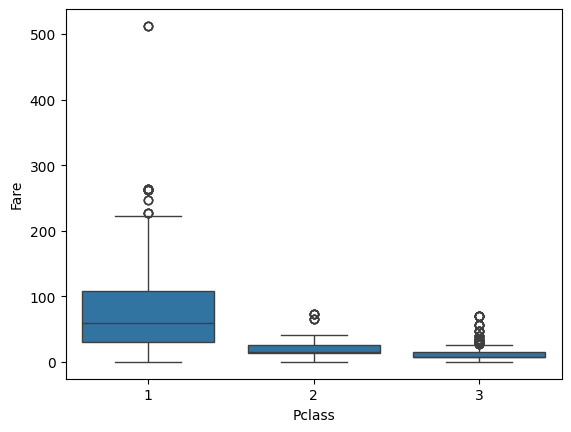

In [46]:
sns.boxplot(data=titanic, x='Pclass', y='Fare')
plt.show()

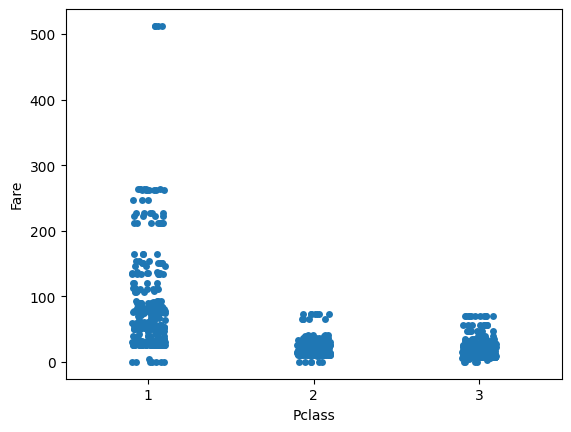

In [47]:
sns.stripplot(data=titanic, x='Pclass', y='Fare')
plt.show()

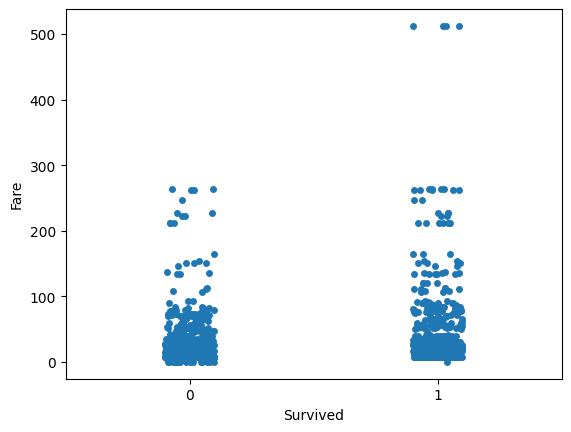

In [48]:
sns.stripplot(data=titanic, x='Survived', y='Fare')
plt.show()

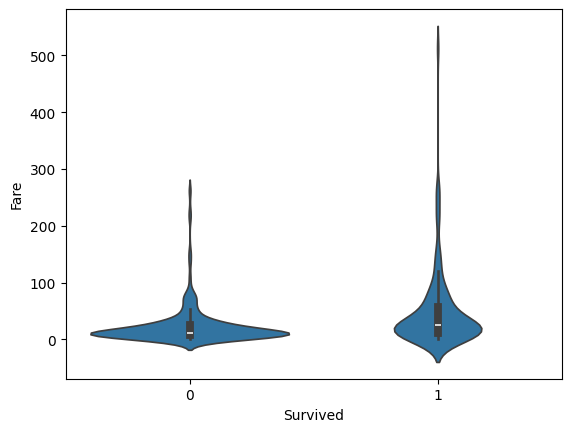

In [49]:
sns.violinplot(data=titanic, x='Survived', y='Fare')
plt.show()
# 좌석등급이 높을수록 요금을 많이 냈고 생존한 사람의 요금 분포는 넓게 나타난다.

## 좌석 등급과 나이와 관계

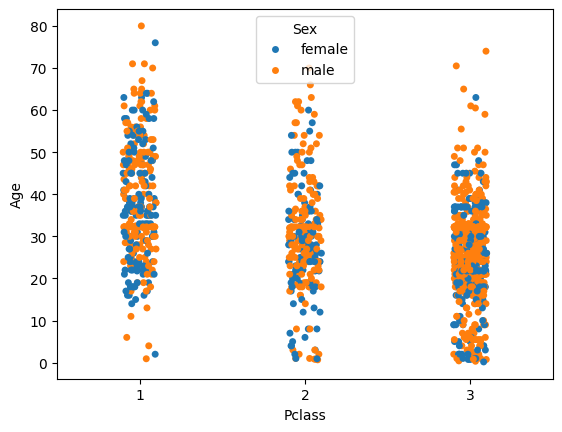

In [50]:
sns.stripplot(data=titanic, x='Pclass', y='Age', hue='Sex')
plt.show()

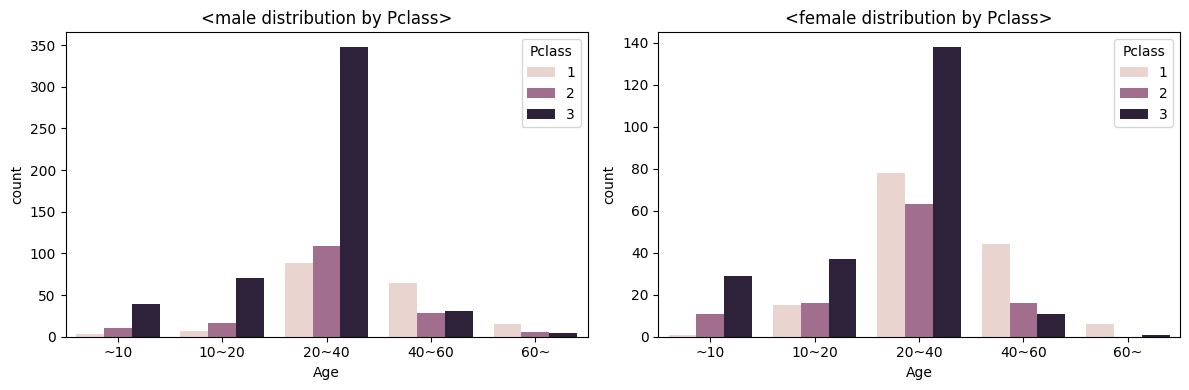

In [51]:
bins = [0, 10, 20, 40, 60, 80]  # 원하는 구간 설정
labels = ['~10', '10~20', '20~40', '40~60', '60~']  # 각 구간에 대한 라벨
age_groups = pd.cut(titanic['Age'], bins=bins, labels=labels)
age_groups

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
temp = pd.concat([titanic[['Survived', 'Sex', 'Pclass']], age_groups], axis=1)
sns.countplot(data=temp[temp['Sex']=='male'], x='Age', hue='Pclass')
plt.title('<male distribution by Pclass>')

plt.subplot(1, 2, 2)
sns.countplot(data=temp[temp['Sex']=='female'], x='Age', hue='Pclass')
plt.title('<female distribution by Pclass>')

plt.tight_layout()
plt.show()

# 어느 등급에서나 20 ~ 40 대가 많이 탔다.
# 1등급에 더 많이 탑승한 연령대가 높은 구간을 집중적으로 살펴보면 40 ~ 60대 사람들이 20 ~ 40대 사람들보다 생존률이 앞서 살펴본바로 더 높았다
# 따라서 의미가 있다고 보여지고 60대 사람들은 기력이 약해 1등급에 탔어도 많이 사망했다고 추정된다.
# 10대 이하가 생존률이 가장 높았는데 나이가 어릴수록 먼저 구해줬고 20대에서 40대보다 40대에서 60대가 생존률이 더 높은 걸로 보아 좌석등급에 영향을 받았다고 판단된다.
# 좌석등급은 어느 정도 생존률에 영향을 크게 준다고 판단된다.

## 좌석등급과 성별간 관계

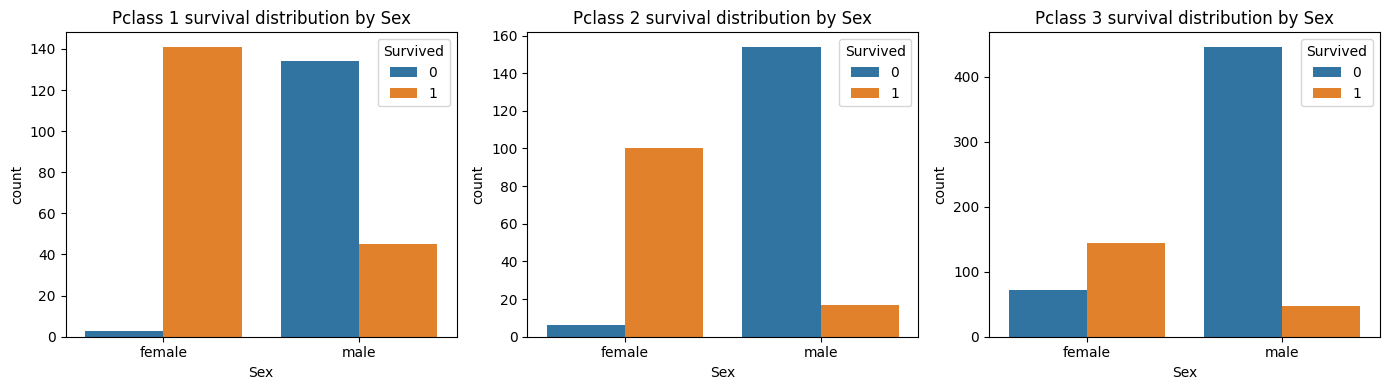

In [52]:
plt.figure(figsize=(14, 4))
for i in range(1, 4):
    p_ = titanic[titanic['Pclass'] == i].sort_values('Sex')
    plt.subplot(1, 3, i)
    sns.countplot(data=p_, x='Sex', hue='Survived')
    plt.title(f'Pclass {i} survival distribution by Sex')

plt.tight_layout()
plt.show()
# 어디에서나 여성의 생존률이 항상 높다. 하지만 특히 1등급에서 생존률이 급격히 높아진다.
# 또한, 모든 등급에서 남성들이 더 많이 탔기에 1등급에 여성들이 더 많이 타서 여성들의 생존률이 더 높은 것이 아니라 여성이라 생존률이 높다고 판단된다.
# 하지만 1등급에서 특히 생존률이 높아지는 것은 의미가 있다.

# 생존 예측

## 원-핫 인코딩

In [53]:
# 대상 : Pclass, Sex, Embarked

train = pd.read_csv('train.csv')

# 전처리
# 나이 결측값 채우기
train['name_cate'] = train['Name'].str.split(",").str[1].str.split(".").str[0]
train['name_cate_avg_age'] = train.groupby('name_cate')['Age'].transform('mean')
train.loc[train['Age'].isnull(), 'Age'] = train.loc[train['Age'].isnull(), 'name_cate_avg_age'].values

# embarked 결측값 채우기
titanic['Embarked'].mode() # 'S'
titanic['Embarked'] = titanic['Embarked'].fillna('S')

# family_size 컬럼 추가
train['family_size'] = train['SibSp'] + train['Parch'] + 1

encoded_Pclass = pd.get_dummies(train['Pclass']).astype(int)
encoded_Sex = pd.get_dummies(train['Sex']).astype(int)
encoded_Embarked = pd.get_dummies(train['Embarked']).astype(int)

temp = pd.concat([train, encoded_Pclass, encoded_Sex, encoded_Embarked], axis=1)

temp = temp.drop(['PassengerId', 'Name', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'name_cate', 'name_cate_avg_age'], axis=1)
temp = temp.rename(columns={1:'P_1', 2:'P_2', 3:'P_3'})

temp

,Survived,Age,SibSp,Parch,Fare,family_size,P_1,P_2,P_3,female,male,C,Q,S
0,0,22.000000,1,0,7.2500,2,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,2,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,1,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,2,1,0,0,1,0,0,0,1
4,0,35.000000,0,0,8.0500,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,0,1,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,1,0,0,1,0,0,0,1
888,0,21.773973,1,2,23.4500,4,0,0,1,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,1,0,0,0,1,1,0,0


## 정규화

In [54]:
# 대상: Age, SibSp, Parch, Fare, FamilySize
scale_columns = ['Age', 'SibSp', 'Parch', 'Fare', 'family_size']
scaler = MinMaxScaler()
temp[scale_columns] = scaler.fit_transform(temp[scale_columns])
temp

,Survived,Age,SibSp,Parch,Fare,family_size,P_1,P_2,P_3,female,male,C,Q,S
0,0,0.271174,0.125,0.000000,0.014151,0.1,0,0,1,0,1,0,0,1
1,1,0.472229,0.125,0.000000,0.139136,0.1,1,0,0,1,0,1,0,0
2,1,0.321438,0.000,0.000000,0.015469,0.0,0,0,1,1,0,0,0,1
3,1,0.434531,0.125,0.000000,0.103644,0.1,1,0,0,1,0,0,0,1
4,0,0.434531,0.000,0.000000,0.015713,0.0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.000,0.000000,0.025374,0.0,0,1,0,0,1,0,0,1
887,1,0.233476,0.000,0.000000,0.058556,0.0,1,0,0,1,0,0,0,1
888,0,0.268333,0.125,0.333333,0.045771,0.3,0,0,1,1,0,0,0,1
889,1,0.321438,0.000,0.000000,0.058556,0.0,1,0,0,0,1,1,0,0


In [55]:
# 데이터 나누기
X_train = temp[temp.columns.difference(['Survived'])]
y_train = temp['Survived']

## test에 대해서도 똑같이 전처리

In [56]:
test = pd.read_csv('test.csv')

test['name_cate'] = test['Name'].str.split(",").str[1].str.split(".").str[0]
test['name_cate_avg_age'] = test.groupby('name_cate')['Age'].transform('mean')
test.loc[test['Age'].isnull(), 'Age'] = test.loc[test['Age'].isnull(), 'name_cate_avg_age'].values

# 이름에 맞는 나이의 평균값으로도 못 채우는 경우는 그냥 삭제
test = test.dropna(subset=['Age'])

test = test.dropna(subset=['Fare'])

test['family_size'] = test['SibSp'] + test['Parch'] + 1

test = test.merge(gender_submission, on='PassengerId', how='left')

test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,name_cate,name_cate_avg_age,family_size,Survived
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,Mr,32.000000,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,Mrs,38.903226,2,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,Mr,32.000000,1,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,Mr,32.000000,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,Mrs,38.903226,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,1305,3,"Spector, Mr. Woolf",male,32.000000,0,0,A.5. 3236,8.0500,NaN,S,Mr,32.000000,1,0
412,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Dona,39.000000,1,1
413,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,32.000000,1,0
414,1308,3,"Ware, Mr. Frederick",male,32.000000,0,0,359309,8.0500,NaN,S,Mr,32.000000,1,0


In [57]:
# 원-핫 인코딩
# 대상 : Pclass, Sex, Embarked
encoded_Pclass = pd.get_dummies(test['Pclass']).astype(int)
encoded_Sex = pd.get_dummies(test['Sex']).astype(int)
encoded_Embarked = pd.get_dummies(test['Embarked']).astype(int)

temp_test = pd.concat([test, encoded_Pclass, encoded_Sex, encoded_Embarked], axis=1)
temp_test = temp_test.drop(['PassengerId', 'Name', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'name_cate', 'name_cate_avg_age'], axis=1)
temp_test = temp_test.rename(columns={1:'P_1', 2:'P_2', 3:'P_3'})

temp_test

,Age,SibSp,Parch,Fare,family_size,Survived,P_1,P_2,P_3,female,male,C,Q,S
0,34.500000,0,0,7.8292,1,0,0,0,1,0,1,0,1,0
1,47.000000,1,0,7.0000,2,1,0,0,1,1,0,0,0,1
2,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0
3,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1
4,22.000000,1,1,12.2875,3,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,32.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
412,39.000000,0,0,108.9000,1,1,1,0,0,1,0,1,0,0
413,38.500000,0,0,7.2500,1,0,0,0,1,0,1,0,0,1
414,32.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


In [58]:
# 정규화
# 대상: Age, SibSp, Parch, Fare, FamilySize
scale_columns = ['Age', 'SibSp', 'Parch', 'Fare', 'family_size']
scaler = MinMaxScaler()
temp_test[scale_columns] = scaler.fit_transform(temp_test[scale_columns])
temp_test

,Age,SibSp,Parch,Fare,family_size,Survived,P_1,P_2,P_3,female,male,C,Q,S
0,0.452723,0.000,0.000000,0.015282,0.0,0,0,0,1,0,1,0,1,0
1,0.617566,0.125,0.000000,0.013663,0.1,1,0,0,1,1,0,0,0,1
2,0.815377,0.000,0.000000,0.018909,0.0,0,0,1,0,0,1,0,1,0
3,0.353818,0.000,0.000000,0.016908,0.0,0,0,0,1,0,1,0,0,1
4,0.287881,0.125,0.111111,0.023984,0.2,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0.419755,0.000,0.000000,0.015713,0.0,0,0,0,1,0,1,0,0,1
412,0.512066,0.000,0.000000,0.212559,0.0,1,1,0,0,1,0,1,0,0
413,0.505473,0.000,0.000000,0.014151,0.0,0,0,0,1,0,1,0,0,1
414,0.419755,0.000,0.000000,0.015713,0.0,0,0,0,1,0,1,0,0,1


In [59]:
X_test = temp_test[temp_test.columns.difference(['Survived'])]
y_test = temp_test['Survived']

## 로지스틱 회귀

In [60]:
# 로지스틱 회귀
model_logi = LogisticRegression(max_iter = 500) # 임의로 지정(max_iter)
model_logi.fit(X_train, y_train)
y_predictions = model_logi.predict(X_test)
print(f"정확도 : {accuracy_score(y_test, y_predictions) * 100}%")

정확도 : 93.75%


## DecisionTree

In [61]:
model_dt = DecisionTreeClassifier(max_depth=4)
model_dt.fit(X_train, y_train)
y_predictions = model_dt.predict(X_test)
print(f"정확도 : {accuracy_score(y_test, y_predictions) * 100}%")

정확도 : 92.78846153846155%


## 랜덤 포레스트

In [62]:
# 랜덤 포레스트
model_rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=125)
model_rf.fit(X_train, y_train)
y_predictions = model_rf.predict(X_test)
print(f"정확도 : {accuracy_score(y_test, y_predictions) * 100}%")

정확도 : 96.63461538461539%
